In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

# Soru 1:
In this assignment, you are going to measure the performance of the model you created with the Titanic dataset in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

* Evaluate your model's performance with cross validation and using different metrics.
* Determine the model with the most appropriate parameters by hyperparameter tuning.

In [2]:
df=pd.read_csv("titanic.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df["Age"]=df.groupby(df["Sex"])["Age"].apply(lambda x : x.fillna(x.mode()[0]))
df.Embarked.fillna(df["Embarked"].mode()[0], inplace=True)
df.Cabin.fillna(df["Cabin"].mode()[0], inplace=True)

In [5]:
df["Embarked"]=pd.get_dummies(df["Embarked"], drop_first=True)

In [7]:
df["Sex"]=pd.get_dummies(df["Sex"], drop_first=True)

### Cross Validation

In [8]:
Y=df["Survived"]
X=df[["Age", "Sex", "Pclass"]]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=465)

# stratify parametresi test ve train kümesindeki verilerin eşit dağılımını sağlar.

In [10]:
print("Rate of train set: %{:.2f}". format(len(X_train)/len(X)*100))
print("Rate of test set: %{:.2f}". format(len(X_test)/len(X)*100))
print("Percent of 0 in Y_train set: %{:.2f}". format(len(Y_train[Y_train==0])/len(Y_train)*100))
print("Percent of 0 in all Y set: %{:.2f}". format(len(Y[Y==0])/len(Y)*100))
print("Pervent of 0 in Y_test set: %{:.2f}". format(len(Y_test[Y_test==0])/len(Y_test)*100),"\n")

print("Length of X_train:", len(X_train))
print("Length of X_test:", len(X_test))
print("Length of Y_train:", len(Y_train))
print("Length of Y_test:", len(Y_test),"\n")

print("Length of X:", len(X))
print("Length of Y:", len(Y))

Rate of train set: %79.91
Rate of test set: %20.09
Percent of 0 in Y_train set: %60.96
Percent of 0 in all Y set: %61.62
Pervent of 0 in Y_test set: %64.25 

Length of X_train: 712
Length of X_test: 179
Length of Y_train: 712
Length of Y_test: 179 

Length of X: 891
Length of Y: 891


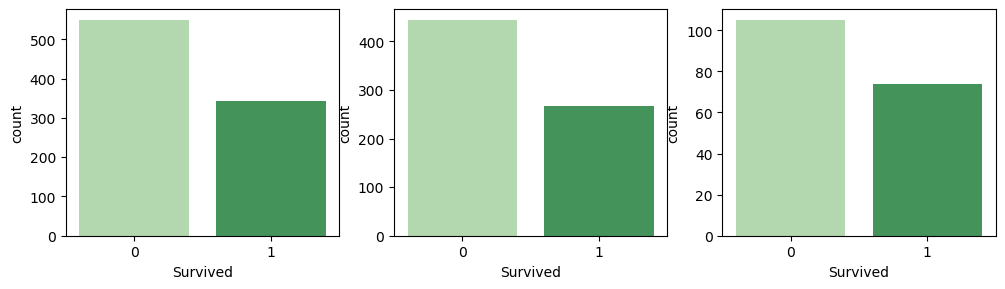

In [10]:
plt.figure(figsize=(12,3), dpi=100)
plt.subplot(1,3,1)
sns.countplot(Y, palette="Greens")

plt.subplot(1,3,2)
sns.countplot(Y_train, palette="Greens")

plt.subplot(1,3,3)
sns.countplot(Y_test, palette="Greens");

In [11]:
log_reg=LogisticRegression()
log_reg.fit(X_train, Y_train)

y_train_predict=log_reg.predict(X_train)
y_test_predict=log_reg.predict(X_test)
log_reg.score(X_train, Y_train)

0.7865168539325843

#### 1) K-Fold Cross Validation

In [12]:
from sklearn.model_selection import KFold

kf=KFold(n_splits=5, shuffle=True, random_state=1111)

In [13]:
pieces=kf.split(X)

for i, (train_index, test_index) in enumerate(pieces):
    print("{}. index & train set size: {}".format(i+1,len(train_index)))
    print("{}. index & test set size: {}". format(i+1,len(test_index)),"\n")

1. index & train set size: 712
1. index & test set size: 179 

2. index & train set size: 713
2. index & test set size: 178 

3. index & train set size: 713
3. index & test set size: 178 

4. index & train set size: 713
4. index & test set size: 178 

5. index & train set size: 713
5. index & test set size: 178 



In [66]:
from sklearn.model_selection import cross_val_score, cross_validate

# Her bir split için modelin doğruluğunu cross_validate() ile buluruz.

log_reg_model=LogisticRegression()

cv=cross_validate(estimator=log_reg_model, X=X, y=Y, cv=10, 
                  return_train_score=True)

print("Train score:", cv["train_score"], sep="\n")
print("\n","Test score:", cv["test_score"])

Train score:
[0.78651685 0.78428928 0.79052369 0.77930175 0.78179551 0.78553616
 0.78927681 0.78802993 0.78179551 0.78428928]

 Test score: [0.78888889 0.79775281 0.73033708 0.83146067 0.80898876 0.7752809
 0.75280899 0.75280899 0.79775281 0.78651685]


In [67]:
print("Mean of train scores: {:.4f}". format(cv['train_score'].mean()))
print("Mean of test scores: {:.4f}". format(cv['test_score'].mean()))


Mean of train scores: 0.7851
Mean of test scores: 0.7823


In [65]:
cv=cross_validate(estimator=log_reg_model, X=X, y=Y, cv=10,
                 return_train_score=True, scoring=["accuracy","precision","r2"])

print("Train set mean accuracy:  {}". format(cv['train_accuracy'].mean()))
print("Train set mean precision: {}". format(cv['train_precision'].mean()))
print("Train set mean r2:        {}". format(cv['train_r2'].mean()),"\n")

print("Test set mean accuracy:   {}". format(cv["test_accuracy"].mean()))
print("Test set mean precision:  {}". format(cv["test_precision"].mean()))
print("Test set mean r2:         {}". format(cv["test_r2"].mean()))

Train set mean accuracy:  0.7851354759169492
Train set mean precision: 0.7248702865068216
Train set mean r2:        0.0915059328731538 

Test set mean accuracy:   0.7822596754057428
Test set mean precision:  0.7183165599897553
Test set mean r2:         0.07923803864980332


In [63]:
cv2=cross_val_score(estimator=log_reg_model, X=X, y=Y, cv=10)

print("Model scores:", cv2, sep="\n")

Model scores:
[0.78888889 0.79775281 0.73033708 0.83146067 0.80898876 0.7752809
 0.75280899 0.75280899 0.79775281 0.78651685]


In [70]:
from sklearn.model_selection import cross_val_predict

y_pred=cross_val_predict(estimator=log_reg_model, X=X, y=Y, cv=10)

print(y_pred[0:20])

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1]


### Hyperparameter Tuning

#### 1) GridSearchCV

In [71]:
parameters= {"C": [10**x for x in range(-5,5,1)],
            "penalty": ["l1", "l2"]}

In [76]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator= log_reg, param_grid= parameters, cv=10)

grid_cv.fit(X,Y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [77]:
print("Best parameters: ", grid_cv.best_params_)
print("Best score:", grid_cv.best_score_)

Best parameters:  {'C': 10, 'penalty': 'l2'}
Best score: 0.7844943820224719


In [85]:
results= grid_cv.cv_results_

df_result=pd.DataFrame(results)
display(df_result.head(3).iloc[:,:6])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty
0,0.002967,0.002203,0.000000,0.00000,1e-05,l1
1,0.007839,0.008491,0.007397,0.00735,1e-05,l2
2,0.000409,0.000943,0.000000,0.00000,0.0001,l1


In [88]:
df_result=df_result[["param_penalty","param_C","mean_test_score"]]
df_result=df_result.sort_values(by="mean_test_score", ascending=False)
df_result

,param_penalty,param_C,mean_test_score
13,l2,10,0.784494
15,l2,100,0.784494
17,l2,1000,0.784494
19,l2,10000,0.784494
9,l2,0.1,0.783396
11,l2,1,0.782260
7,l2,0.01,0.756492
1,l2,1e-05,0.616167
3,l2,0.0001,0.616167
5,l2,0.001,0.616167


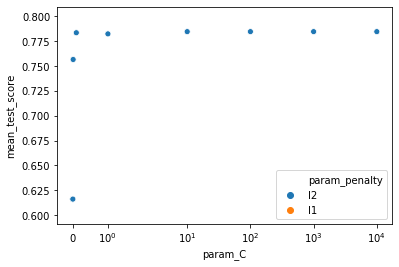

In [89]:
sns.scatterplot(x="param_C", y="mean_test_score", hue="param_penalty",data=df_result)
plt.xscale("symlog");

# grafikten de görüldüğü gibi l1 parametresi nin performansı iyi değildir

#### 2) RandomizedSearchCV

In [91]:
from sklearn.model_selection import RandomizedSearchCV

parameters= {"C": [10**x for x in range(-5,5,1)],
            "penalty": ["l1", "l2"]}

rs_cv=RandomizedSearchCV(estimator=log_reg,
                        param_distributions=parameters,
                        cv=10,
                        n_iter=10,
                        random_state=111,
                        scoring="precision")
rs_cv.fit(X,Y)


RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   random_state=111, scoring='precision')

In [92]:
print(rs_cv.best_params_)
print(rs_cv.best_score_)

{'penalty': 'l2', 'C': 10}
0.7226249115137265


Randomized search algoritmasının en iyi doğruluğu %72 iken grid search algoritmasının %78'dir; dolayıısyla grid search algoritmasını kullanmak model tahminin de daha avantajlıdır.